In [1]:
# import libraries for data analysis
import numpy as np
import pandas as pd 

# import Libraries for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\DELL\AppData\Local\Temp\ipykernel_14672\3634898307.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read data from the dataset into dataframe
age_group_details = pd.read_csv('AgeGroupDetails.csv')
covid_19_india = pd.read_csv('covid_19_india.csv')
hospital_beds_india = pd.read_csv('HospitalBedsIndia.csv')
icmr_testing_labs = pd.read_csv('ICMRTestingLabs.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
population_india_census = pd.read_csv('population_india_census2011.csv')
state_wise_testing_details = pd.read_csv('StatewiseTestingDetails.csv')

In [3]:
print(population_india_census['State / Union Territory'],"\n\n")
print(individual_details['detected_district'],"\n\n")
print(individual_details['detected_state'],"\n\n")

0                                Uttar Pradesh
1                                  Maharashtra
2                                        Bihar
3                                  West Bengal
4                               Madhya Pradesh
5                                   Tamil Nadu
6                                    Rajasthan
7                                    Karnataka
8                                      Gujarat
9                               Andhra Pradesh
10                                      Odisha
11                                   Telengana
12                                      Kerala
13                                   Jharkhand
14                                       Assam
15                                      Punjab
16                                Chhattisgarh
17                                     Haryana
18                                 Uttarakhand
19                            Himachal Pradesh
20                                     Tripura
21           

In [3]:
# update the state name for Teleangana
population_india_census['State / Union Territory'] = population_india_census['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

#update the distrct name for Ahmedabad
individual_details['detected_district'] = individual_details['detected_district'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

#update the city name for Ahmedabad
individual_details['detected_city'] = individual_details['detected_city'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

In [5]:
print(population_india_census['State / Union Territory'],"\n\n")
print(individual_details['detected_district'],"\n\n")
print(individual_details['detected_state'],"\n\n")

0                                Uttar Pradesh
1                                  Maharashtra
2                                        Bihar
3                                  West Bengal
4                               Madhya Pradesh
5                                   Tamil Nadu
6                                    Rajasthan
7                                    Karnataka
8                                      Gujarat
9                               Andhra Pradesh
10                                      Odisha
11                                   Telangana
12                                      Kerala
13                                   Jharkhand
14                                       Assam
15                                      Punjab
16                                Chhattisgarh
17                                     Haryana
18                                 Uttarakhand
19                            Himachal Pradesh
20                                     Tripura
21           

In [4]:
date_cumulative = covid_19_india.groupby('Date').sum()
date_cumulative.reset_index(inplace = True)

# Change the date format to 'YYYY-MM-DD'
date_cumulative['Date'] = date_cumulative['Date'].apply(lambda date : '20' + '-'.join(date.split('/')[::-1]))

# Sort the rows by rate (in ascending order)
date_cumulative.sort_values('Date', inplace = True)

# Calculate the number of active cases
date_cumulative['Active'] = date_cumulative['Confirmed'] - (date_cumulative['Cured'] + date_cumulative['Deaths'])

date_cumulative = date_cumulative[['Date', 'Confirmed', 'Cured', 'Deaths', 'Active']]

# Dataframe with number of cases (categorised by current health status) grouped by date 
date_cumulative.head()

,Date,Confirmed,Cured,Deaths,Active
116,2020-01-30,1,0,0,1
119,2020-01-31,1,0,0,1
0,2020-02-01,2,0,0,2
4,2020-02-02,3,0,0,3
8,2020-02-03,3,0,0,3


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

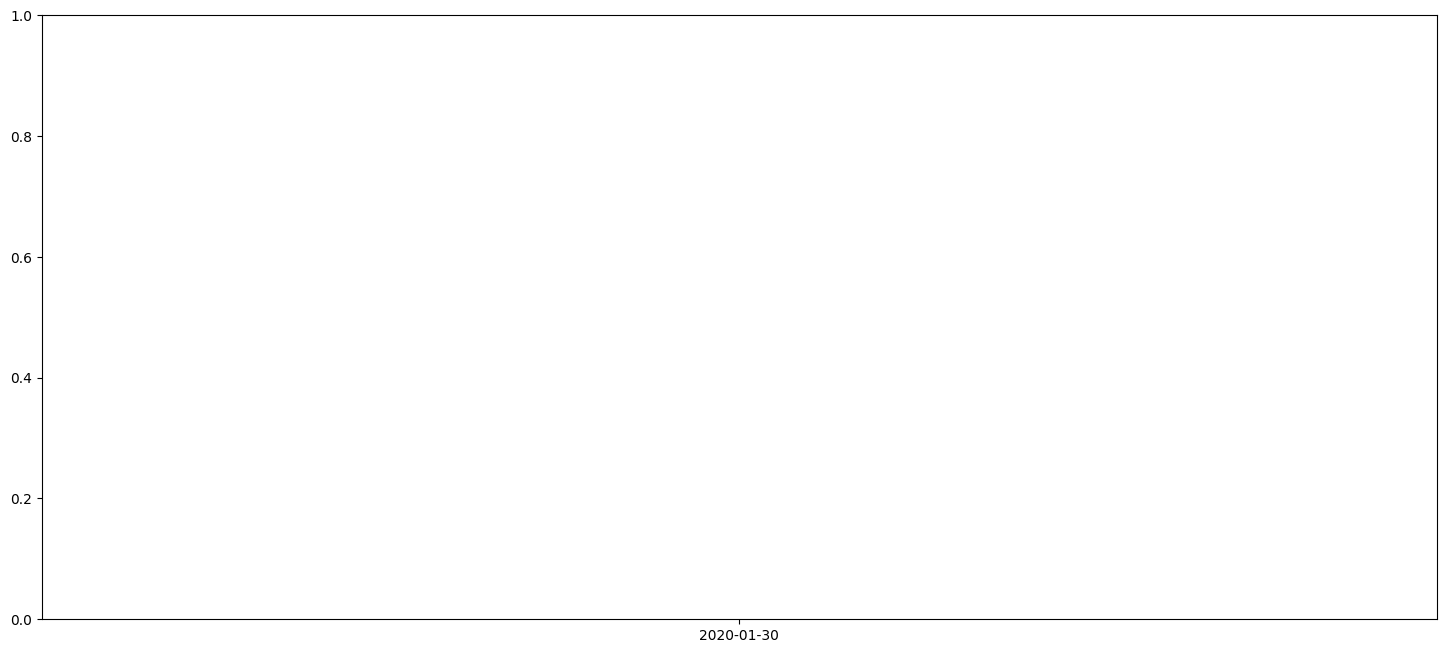

In [5]:
plt.figure(figsize=(18, 8), dpi=100)
sns.lineplot(x='Date', y='Confirmed', data= date_cumulative, label= 'Confirmed', color = 'blue', marker = 'o')
sns.lineplot(x='Date', y='Cured', data= date_cumulative, label= 'Cured', color = 'green')
sns.lineplot(x='Date', y='Deaths', data= date_cumulative, label= 'Deaths', color = 'black')
sns.lineplot(x='Date', y='Active', data= date_cumulative, label= 'Active', color = 'red')
plt.title('Cumulative Number of cases (categorised by current health status) grouped by date')
plt.ylabel('Number of cases')
plt.legend(loc = 0)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [8]:
print(sns.__version__)

0.11.2
